In [1]:
import numpy as np
import pandas as pd
import nltk

In [158]:
data = pd.read_csv("D:/data/coffee.csv")

# Data Description

In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  542 non-null    object
 1   stars    542 non-null    int64 
 2   reviews  542 non-null    object
dtypes: int64(1), object(2)
memory usage: 12.8+ KB


In [160]:
data.describe()

,stars
count,542.000000
mean,3.819188
std,1.586845
min,1.000000
25%,2.000000
50%,5.000000
75%,5.000000
max,5.000000


In [162]:
data.head(3)

,user_id,stars,reviews
0,A2XP9IN4JOMROD,1,I wanted to love this. I was even prepared for...
1,A2TS09JCXNV1VD,5,Grove Square Cappuccino Cups were excellent. T...
2,AJ3L5J7GN09SV,2,I bought the Grove Square hazelnut cappuccino ...


### EDA 

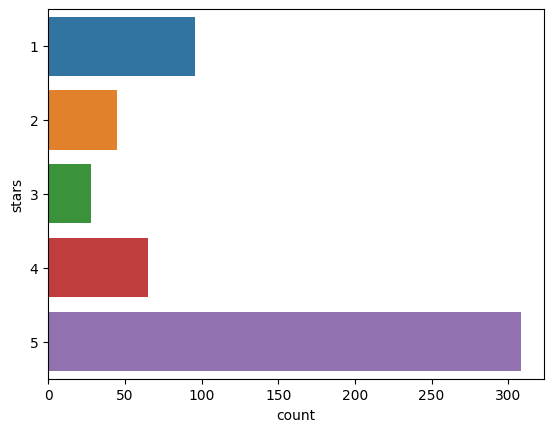

In [183]:
import seaborn as sns
sns.countplot(y='stars',data=data)
plt.show()

### Data Preprocessing 

In [164]:
import re

In [165]:
cleanup_re = re.compile('[^a-z]+')
def cleanup(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = cleanup_re.sub(' ', sentence).strip()
    #sentence = " ".join(nltk.word_tokenize(sentence))
    return sentence

In [166]:
# before applying cleaning text
data.reviews

0      I wanted to love this. I was even prepared for...
1      Grove Square Cappuccino Cups were excellent. T...
2      I bought the Grove Square hazelnut cappuccino ...
3      I love my Keurig, and I love most of the Keuri...
4      It's a powdered drink. No filter in k-cup.<br ...
                             ...                        
537    This is my favorite K-Cup flavor.  I like my c...
538    If you are looking for the taste of French Van...
539    I have purchased and used 3 boxes of the Hazel...
540    Yummy, great tasting and very convenient.  Onl...
541    For an enjoyable change from a coffee routine,...
Name: reviews, Length: 542, dtype: object

In [167]:
#after applying clean text
data.reviews.apply(cleanup)

0      i wanted to love this i was even prepared for ...
1      grove square cappuccino cups were excellent ta...
2      i bought the grove square hazelnut cappuccino ...
3      i love my keurig and i love most of the keurig...
4      it s a powdered drink no filter in k cup br ju...
                             ...                        
537    this is my favorite k cup flavor i like my cof...
538    if you are looking for the taste of french van...
539    i have purchased and used boxes of the hazelnu...
540    yummy great tasting and very convenient only d...
541    for an enjoyable change from a coffee routine ...
Name: reviews, Length: 542, dtype: object

In [168]:
data['reviews'] = data.reviews.apply(cleanup)

In [169]:
import matplotlib.pyplot as plt

### Checkiing polarity in reviews 

In [134]:
from textblob import TextBlob
from nltk.corpus import stopwords

In [137]:
eng = stopwords.words('english')

In [174]:
filter=[]
for w in data['reviews']:
    if w not in eng:
        filter.append(w)

In [175]:
filters = pd.DataFrame(filter,columns=["review"])

In [152]:
type(filters)

pandas.core.frame.DataFrame

In [176]:
pol = lambda x: TextBlob(x).sentiment.polarity
data['polarity'] = filters['review'].apply(pol)

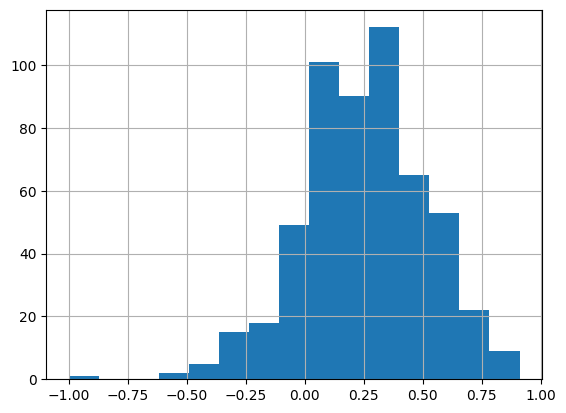

In [177]:
data['polarity'].hist(bins=15)
plt.show()

In [178]:
data['reviews'][data['polarity']>0.2]

1      grove square cappuccino cups were excellent ta...
3      i love my keurig and i love most of the keurig...
4      it s a powdered drink no filter in k cup br ju...
9      i bought a keurig and bought these to try well...
10     my husband and i love this french vanilla capp...
                             ...                        
536    i received a sample of this with a variety pac...
537    this is my favorite k cup flavor i like my cof...
539    i have purchased and used boxes of the hazelnu...
540    yummy great tasting and very convenient only d...
541    for an enjoyable change from a coffee routine ...
Name: reviews, Length: 317, dtype: object

In [180]:
data['reviews'][data['polarity']<0.2]

0      i wanted to love this i was even prepared for ...
2      i bought the grove square hazelnut cappuccino ...
5      not enough coffee flavor and definitely to swe...
6      don t bother bet you couldn t tell the differe...
7      never tasted this coffee before i felt much to...
                             ...                        
530    in order to get the fastest coffee on earth i ...
532    it tastes like a decent powdered cappuccino be...
534    this is good no you probably don t want to use...
535    this product just a repackaged instant coffee ...
538    if you are looking for the taste of french van...
Name: reviews, Length: 222, dtype: object

In [181]:
#checking the sentiment on the polarity
317/547

0.5795246800731262

In [182]:
#polarity for negativity
222/547

0.40585009140767825

## Conclusion

after reviews the text polarity of reviews there not much difference
in the positivity on product still need to improve